In [43]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import Image



In [44]:
# read files from data folder 
CSV_PATH_PALM = os.path.join('..', 'data','palm_oil_production.csv')
CSV_PATH_FOREST = os.path.join('..', 'data','change_forest.csv')
CSV_PATH_LAND = os.path.join('..', 'data','land_use_palm.csv')


In [45]:

COLS_TO_USE = ['Entity', 'Code', 
              'Year', 'Tonnes']

df_palm = pd.read_csv(CSV_PATH_PALM, usecols=COLS_TO_USE)
df_forest = pd.read_csv(CSV_PATH_FOREST)
df_land = pd.read_csv(CSV_PATH_LAND)


In [46]:
# simplify column names of dataframe 
df_forest.rename(columns={"Annual net change in forest area": 
                        "Forest_Change"}, inplace=True)

df_land.rename(columns={"Crops - Oil palm fruit - 254 - Area harvested - 5312 - ha": 
                                "Palm_Land_Use"}, inplace=True)


In [47]:

# data cleaning
# check for null values
df_palm.isnull().sum()
df_forest.isnull().sum()
df_land.isnull().sum()


Entity             0
Code             934
Year               0
Palm_Land_Use      0
dtype: int64

In [48]:

# fill out null values
df1 = df_palm.fillna(value = 'NOT COUNTRY')
df2 = df_forest.fillna(value = 'NOT COUNTRY')
df3 = df_land.fillna(value = 'NOT COUNTRY')

In [49]:


# New dataframes that contain only countries
Code = ['NOT COUNTRY', 'OWID_WRL']

indexNames1 = df1[df1['Code'].isin(Code)].index
df_palm_country = df1.drop(indexNames1)

indexNames2 = df2[df2['Code'].isin(Code)].index
df_forest_country = df2.drop(indexNames2)

indexNames3 = df3[df3['Code'].isin(Code)].index
df_land_countrt = df3.drop(indexNames3)

In [50]:
df_palm_country['Tonnes'].mean()

466470.98434925865

In [51]:
df_palm_country['Tonnes'].max()

40567230

In [52]:
# Find the countries produce the most palm oil
df_palm_country_top = df_palm_country[df_palm_countrty['Tonnes'] 
                                        > df_palm_countrty['Tonnes'].mean()]
Top_Production_Country = df_palm_country_top.Entity.unique()
Top_Production_Country

array(['Colombia', 'Ecuador', 'Guatemala', 'Honduras', 'Indonesia',
       'Malaysia', 'Melanesia', 'Nigeria', 'Papua New Guinea', 'Thailand'],
      dtype=object)

In [53]:
#print("The countries that produce the most palm oil are:\n")
#i= 1
#for country in Top_Production_Country:
#    print(i, ". ", country)
#    i += 1

In [54]:
# entity_counts = df_palm_countrty['Entity'].value_counts()
# s = entity_counts[entity_counts > entity_counts.mean()]

# s

<AxesSubplot:xlabel='Year'>

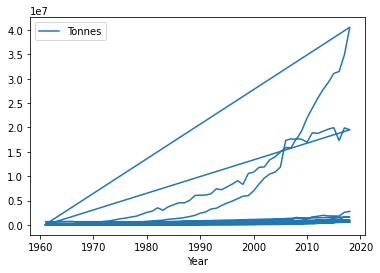

In [55]:
df_palm_country.loc[df_palm_country['Entity'].isin(Top_Production_Country), :].plot(x='Year',legend=True)

In [56]:
combined_sorted = df_palm_country.sort_values(by="Tonnes", ascending=False)



In [57]:
combined_sorted.set_index("Entity", inplace=True)
ranking = combined_sorted.head(15)

In [60]:
df_palm_plot = df_palm_country.loc[df_palm_country['Entity'].isin(Top_Production_Country), :]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


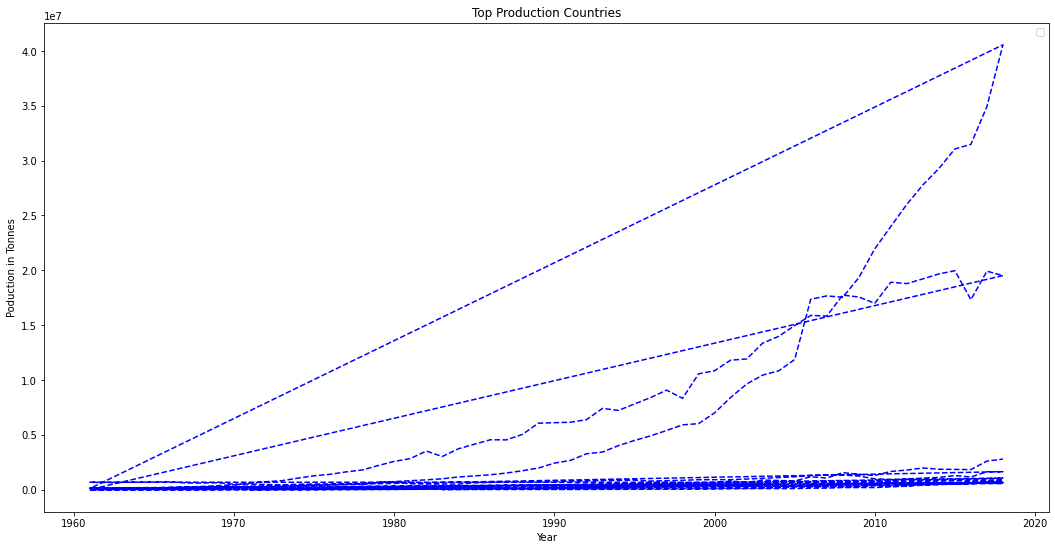

In [59]:

fig, axes = plt.subplots(figsize=(18,9))

axes.set_title('Top Production Countries')

axes.set_xlabel('Year')
axes.set_ylabel('Poduction in Tonnes')

axes.plot((df_palm_plot['Year']),df_palm_plot['Tonnes'] , 'b--')
#axes.plot((df4['Year']),df4['Tonnes'], '--c', label = s.index[1] )
#axes.plot((df5['Year']),df5['Tonnes'], ':r' , label = s.index[-6] )

axes.legend()